In [37]:
import pts_loader
path = r'C:\Users\Meers\Documents\Techie\InkersIntern\Phase2\Merget\300w_cropped\01_Indoor\indoor_001.pts'
points = pts_loader.load(path)
print(points)

[(193.0, 91.0), (196.459, 119.344), (197.957, 150.614), (207.552, 176.986), (218.486, 202.157), (235.087, 226.842), (253.016, 246.438), (271.662, 263.865), (300.315, 271.435), (325.732, 266.26), (346.361, 248.966), (362.947, 220.651), (374.439, 197.999), (382.375, 179.064), (389.063, 156.371), (394.302, 124.753), (393.518, 92.944), (217.271, 117.87), (233.218, 109.415), (250.097, 114.454), (266.714, 120.09), (280.68, 127.609), (318.937, 123.59), (332.702, 117.155), (349.344, 109.07), (367.077, 103.951), (380.964, 111.236), (301.931, 145.072), (301.589, 161.106), (301.658, 177.57), (301.777, 194.295), (279.717, 197.93), (290.637, 202.841), (302.652, 205.483), (312.441, 202.069), (323.368, 197.061), (234.474, 136.436), (246.184, 132.337), (260.781, 133.589), (274.594, 143.047), (260.422, 144.769), (246.117, 144.737), (326.876, 140.815), (337.901, 130.008), (352.648, 128.376), (365.343, 132.671), (353.771, 140.525), (340.466, 141.419), (266.04, 229.04), (283.292, 221.978), (294.001, 221.1

In [38]:
def scale_pts(img, pts):
    new_img = cv2.resize(img, (96, 96))
    #print(img.shape)
    scale_x = 96.0/img.shape[0]
    scale_y = 96.0/img.shape[1]
    #print(scale_x, scale_y)
    new_points =[]
    for p in pts:
        new_pts = []
        new_pts = (p[0] * scale_y , p[1] * scale_x )
        new_points.append(new_pts)
    #print (pts)
    #print(new_points)
    return new_img, new_points
    

(444, 588, 3)


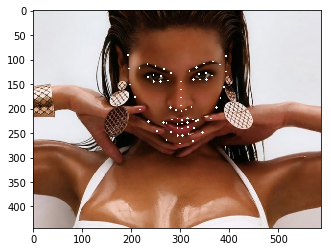

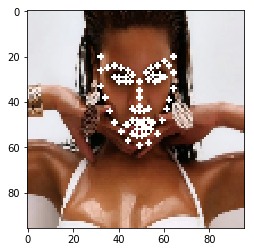

In [39]:
import numpy as np
import matplotlib.pyplot as plt
import cv2
path = r'C:\Users\Meers\Documents\Techie\InkersIntern\Phase2\Merget\300w_cropped\01_Indoor\indoor_001.png'
img = cv2.imread(path)
print(img.shape)


new_img, new_points = scale_pts(img, points)

for (x, y) in points:
    cv2.circle(img, (round(x), round(y)),  2, (255,255,255), -1)

for (x, y) in new_points:
    cv2.circle(new_img, (round(x), round(y)),  1, (255,255,255), -1)

plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
plt.show()

plt.imshow(cv2.cvtColor(new_img, cv2.COLOR_BGR2RGB))
plt.show()


In [123]:
def bilinear_interpolation(x, y):
    print(x, y)
    dx = float(x-int(x))
    dy = float(y-int(y))

    wtl = float((1.0 - dx) * (1.0 - dy))
    wtr = float((dx)       * (1.0 - dy))
    wbl = float((1.0 - dx) * (dy))
    wbr = float((dx)       * (dy))
    print(wtl, wtr, wbl, wbr)

In [41]:
nlandmarks = len(new_points)
#print(nlandmarks)
landmarks = []
i = 0
for p in new_points:
    landmarks.append(np.zeros((96, 96, 1), np.uint8))
    x = int(p[0])
    y = int(p[1])
    landmarks[i][x][y][0] = 255 #WHite
    
    #plt.imshow(landmarks[i].squeeze(), cmap='Greys_r')
    #plt.show()
    i = i+1



In [42]:
import numpy as np
f = open(r'C:\Users\Meers\Documents\Techie\InkersIntern\Phase2\Merget\Merget\network\config\kernel45.txt')
kernel45 = np.fromfile(f, dtype = np.float32, count = -1, sep = " ")
#kernel45 = np.reshape(kernel45, (45, 45))

In [65]:
import tensorflow as tf
def apply_kernel(local_out):
    '''
     get kernel from text file
     tile it to 1x1x45x45
     convolve with local out
    '''
    f = open(r'C:\Users\Meers\Documents\Techie\InkersIntern\Phase2\Merget\Merget\network\config\kernel45.txt')
    kernel45 = np.fromfile(f, dtype = np.float32, count = -1, sep = " ")
    
    # [1 x 1 x 45 x 45]
    kernel45 = np.reshape(kernel45, (45, 45, 1, 1))
    # [numLabels x 1 x 45 x 45] if tensor convolution is used
    kernel_stacked 	= np.tile(kernel45, ( 1, 1, 1, 68))
    kernel_tensor = tf.convert_to_tensor(kernel_stacked, dtype=tf.float32)
    print("local_out", local_out)
    print("kernel", kernel_tensor)
    
    return tf.nn.depthwise_conv2d(local_out, kernel_tensor, strides=[1,1,1,1],
                                   padding="SAME")

    '''
    groups = []
    
    for j in range(68):
        groups.append(tf.nn.conv2d(local_out, kernel_tensor, strides=[1,1,1,1],
                                   padding="SAME"))
    
    heatmaps = tf.concat(groups, 0)
    heatmaps = tf.reshape(heatmaps, (-1, 96, 96, 68))
    print("Heatmaps", heatmaps)
    return heatmaps
'''
landmarks = np.array(landmarks)
landmarks = landmarks.reshape((96,96,68,1))
Gn_tensor = tf.convert_to_tensor(landmarks, dtype=tf.float32)
heatmaps = apply_kernel(Gn_tensor)
print('Heatmaps', heatmaps)

local_out Tensor("Const_34:0", shape=(96, 96, 68, 1), dtype=float32)
kernel Tensor("Const_35:0", shape=(45, 45, 1, 68), dtype=float32)
Heatmaps Tensor("depthwise_4:0", shape=(96, 96, 68, 68), dtype=float32)


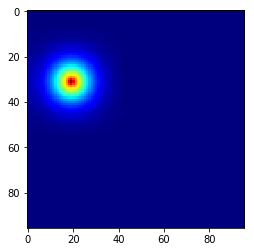

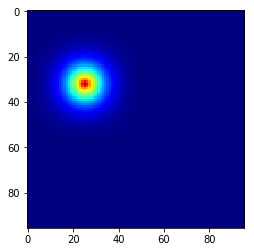

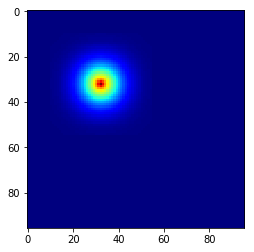

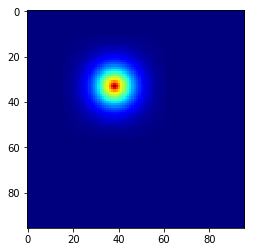

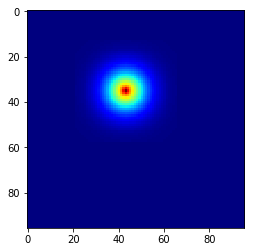

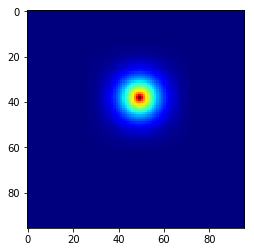

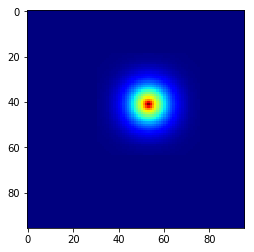

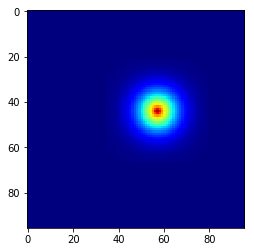

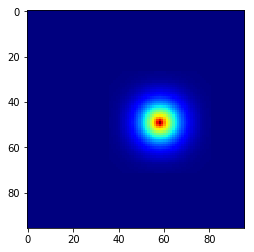

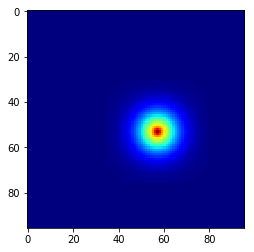

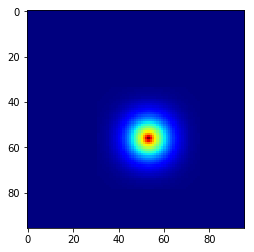

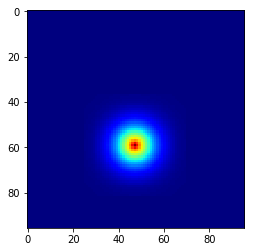

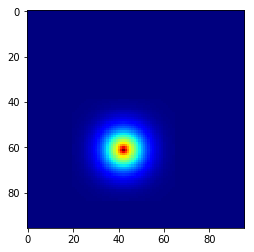

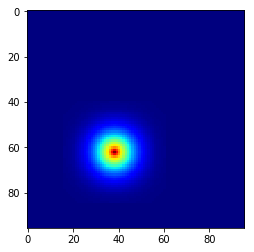

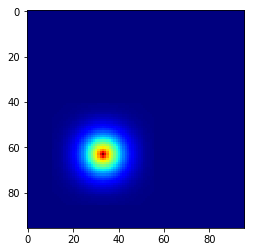

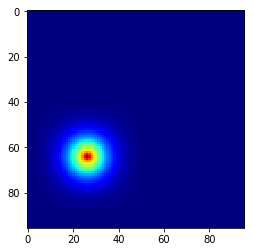

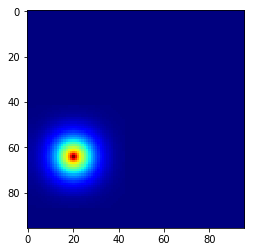

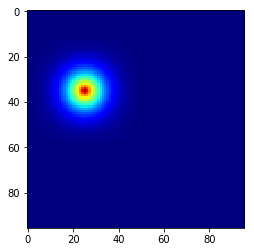

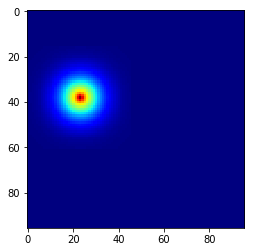

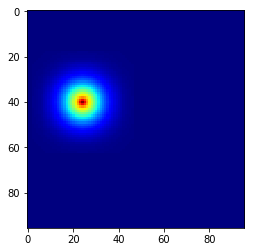

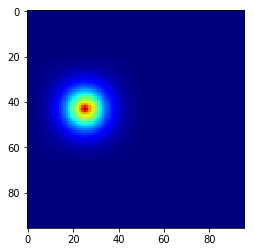

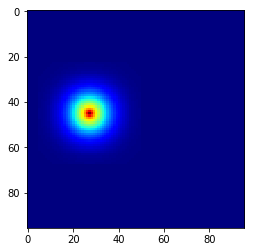

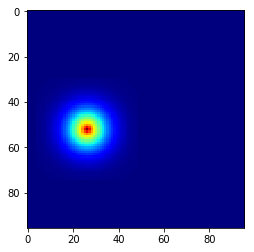

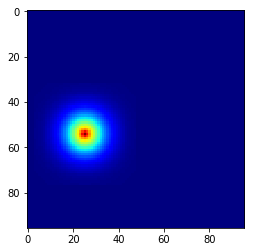

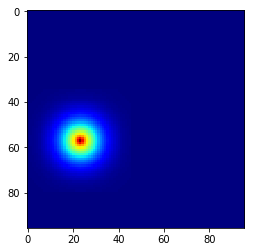

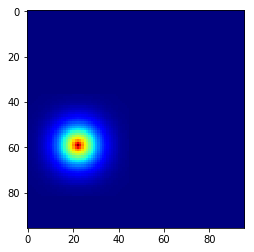

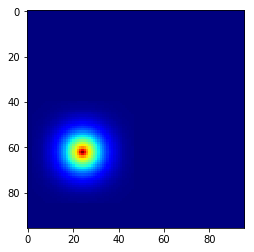

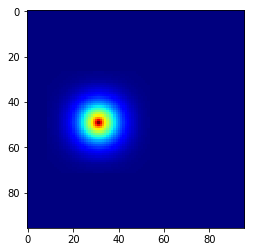

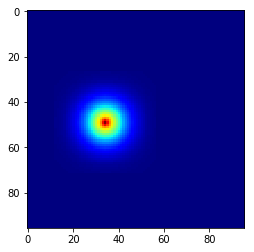

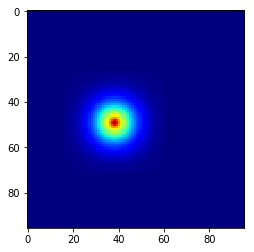

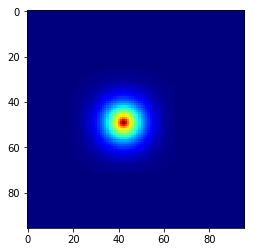

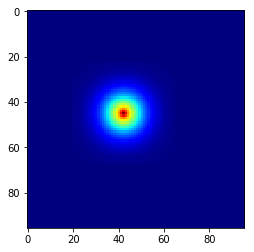

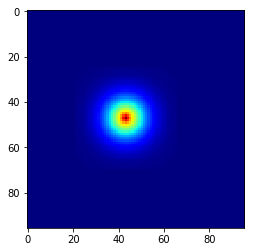

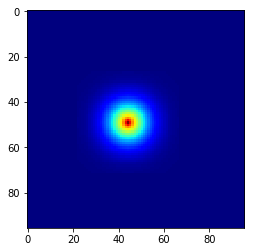

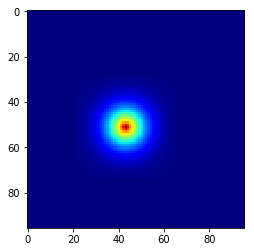

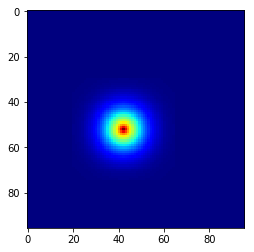

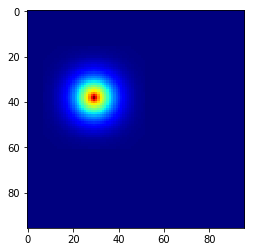

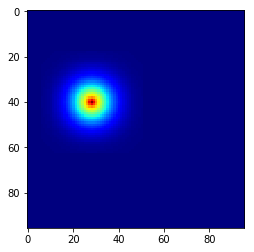

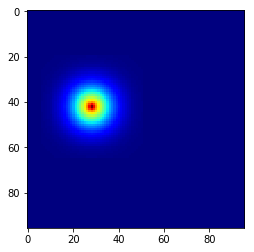

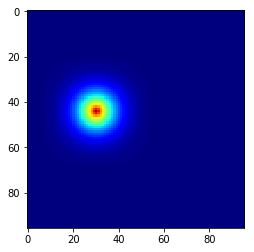

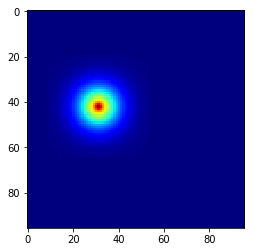

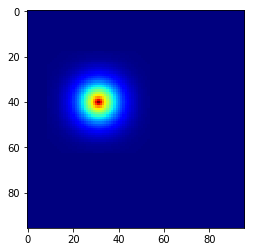

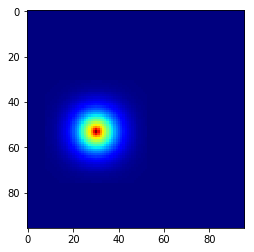

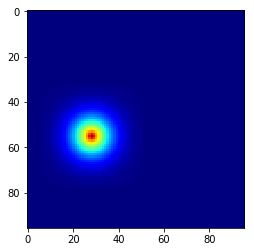

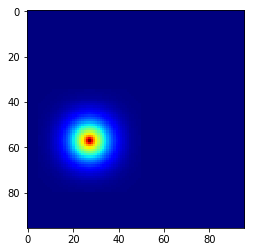

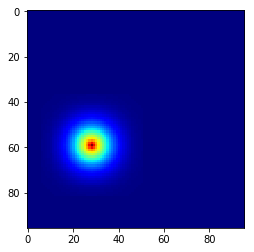

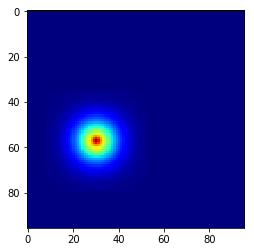

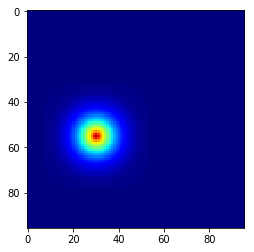

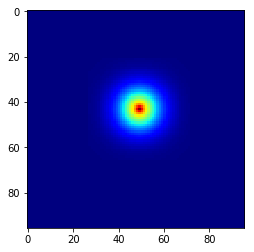

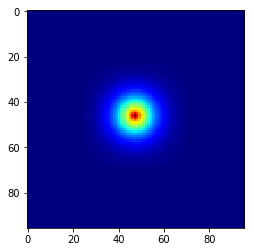

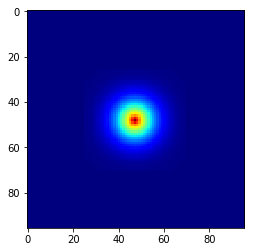

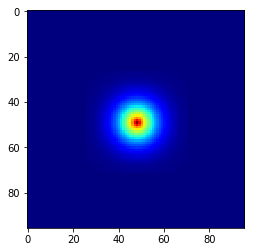

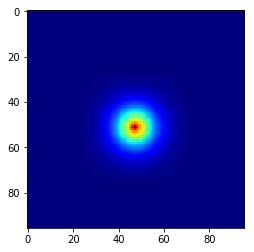

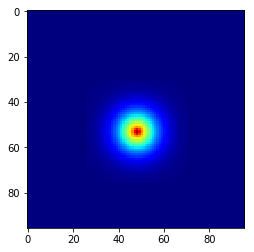

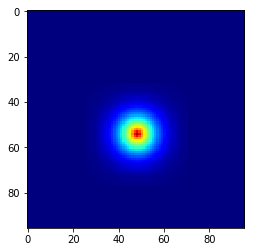

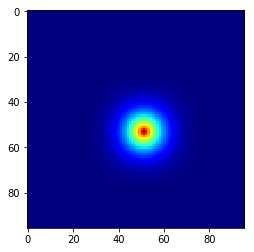

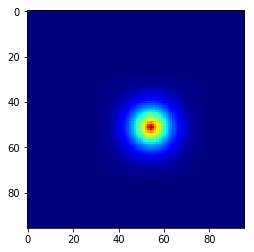

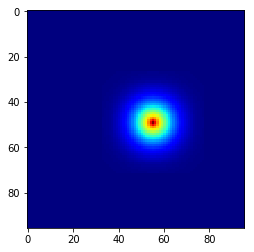

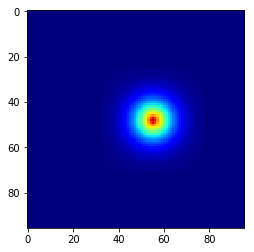

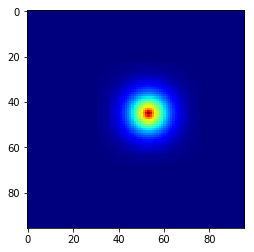

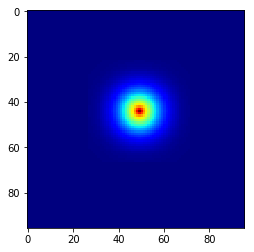

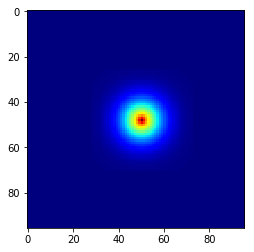

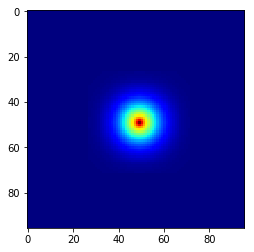

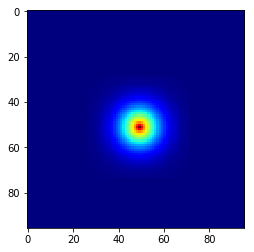

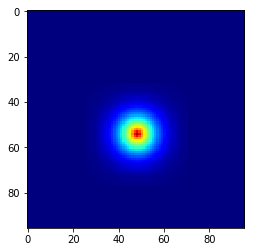

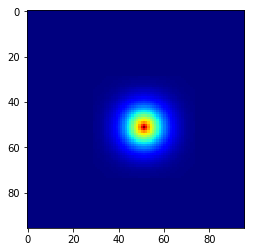

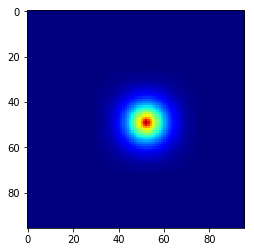

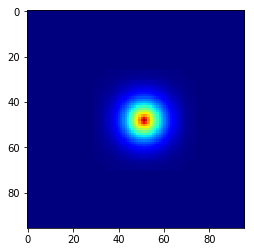

In [234]:
heatmaps = []
i = 0
for landmark in landmarks:
    heatmaps.append(cv2.filter2D(landmark,-1,kernel45))
    plt.imshow(heatmaps[i], cmap='jet')
    plt.show()
    i = i + 1

In [248]:
# Find global maximum per heatmap
coords = []
print(new_points[0][0], new_points[0][1])
for h in heatmaps:
    coord = []
    ind = np.unravel_index(np.argmax(h, axis=None), h.shape)
    print(ind)
    break

31.51020408163265 19.675675675675677
(31, 19)


* Loss Function: Weighted Square Error
* Exclude non-labeled landmarks from the loss
* Weight each of N landmarks depending on whether they lie within the image boundary:
\begin{equation*}
wij = V (i,j) + \frac{L(i,j)}{10} + \frac{L(i,j)}{2N}\sum_{k=1}^N V (i,k),       \\[1pt]
\text{    where V (i; j) and L(i; j) are indicator functions with L(i; j) = 1 iff landmark j in face i is labeled}    \\[1pt]
\text {V (i; j) = 1 iff landmark j in face i is within the image boundary, zero otherwise.    }\\[1pt]
\text{Note that L(i; j) = 0 implies V (i; j) = 0.}\end{equation*}

\begin{equation*}
e_i = \sum_{n=1}^N w_{in}(((O^l_n - G_n) * K)^2 + (O^g_n - G_n * K)^2), \\[2pt]
\text{    where    } \\[2pt]
O^l_n    and    O^g_n = \text{nth channels of the local- and global context subnet outputs, respectively.} \\[1pt]
\text{K = kernel }   \\[1pt]
\text{Gn = ground truth heatmap for landmark n }   \\[1pt]
\text{For efficiency, the kernel convolution after stacking is reused for the loss}
\end{equation*}

In [2]:
import tensorflow as tf

def landmark_weight(labels):
    #[numLabels x 1 x 1]
    Win = tf.reduce(labels)
    Win = Win * 0.5
    return Win

'''
Ol, Og - [numLabels x ImageH x ImageW]
Gn - Groundtruth heatmaps with Kernel applied
labels and ground truth heatmaps are different???
'''
def loss_function(Ol, Og, Kernel, Gn, labels):
    
    ground_K = []
    Win = landmark_weight(labels)

    # Gn x K
    for landmark in Gn:
        ground_K.append(cv2.filter2D(landmark,-1,Kernel))
    # Og - Gn x K
    global_diff = Og - ground_K
    global_err = tf.square(Og - ground_K)
    
    # (Ol - Gn) x K
    local_diff = Ol - Gn
    local_err = tf.square(cv2.filter2D(local_diff,-1,Kernel))
    
    comb_err = local_err + global_err
    
    wt_square_err = tf.reduce_sum(Win * comb_err)
    return wt_square_err


In [8]:
import numpy as np
f = open(r'C:\Users\Meers\Documents\Techie\InkersIntern\Phase2\FLDCode\sigma 1.txt')
kernel45_1 = np.fromfile(f, dtype = np.float32, count = -1, sep = " ")
kernel45_1 = np.reshape(kernel45_1, (45, 45))
print(kernel45_1.shape)

(45, 45)


In [9]:
f = open(r'C:\Users\Meers\Documents\Techie\InkersIntern\Phase2\FLDCode\sigma2.txt')
kernel45_2 = np.fromfile(f, dtype = np.float32, count = -1, sep = " ")
kernel45_2 = np.reshape(kernel45_2, (45, 45))
print(kernel45_2.shape)

(45, 45)


In [10]:
f = open(r'C:\Users\Meers\Documents\Techie\InkersIntern\Phase2\FLDCode\sigma3.txt')
kernel45_3 = np.fromfile(f, dtype = np.float32, count = -1, sep = " ")
kernel45_3 = np.reshape(kernel45_3, (45, 45))
print(kernel45_3.shape)

(45, 45)


In [11]:
f = open(r'C:\Users\Meers\Documents\Techie\InkersIntern\Phase2\FLDCode\sigma4.txt')
kernel45_4 = np.fromfile(f, dtype = np.float32, count = -1, sep = " ")
kernel45_4 = np.reshape(kernel45_4, (45, 45))
print(kernel45_4.shape)

(45, 45)


In [12]:
f = open(r'C:\Users\Meers\Documents\Techie\InkersIntern\Phase2\FLDCode\sigma5.txt')
kernel45_5 = np.fromfile(f, dtype = np.float32, count = -1, sep = " ")
kernel45_5 = np.reshape(kernel45_5, (45, 45))
print(kernel45_5.shape)

(45, 45)


In [13]:
# (2s - 1)2 x kernel1
kernel45_1 = kernel45_1 * 1

In [14]:
# (2s - 1)2 x kernel2
print(kernel45_2[0])
kernel45_2 = kernel45_2 * 9
print(kernel45_2[0])

[5.00e-06 7.00e-06 9.00e-06 1.10e-05 1.40e-05 1.70e-05 2.10e-05 2.50e-05
 3.00e-05 3.60e-05 4.20e-05 4.80e-05 5.50e-05 6.20e-05 6.90e-05 7.50e-05
 8.10e-05 8.70e-05 9.20e-05 9.60e-05 9.90e-05 1.01e-04 1.02e-04 1.01e-04
 9.90e-05 9.60e-05 9.20e-05 8.70e-05 8.10e-05 7.50e-05 6.90e-05 6.20e-05
 5.50e-05 4.80e-05 4.20e-05 3.60e-05 3.00e-05 2.50e-05 2.10e-05 1.70e-05
 1.40e-05 1.10e-05 9.00e-06 7.00e-06 5.00e-06]
[4.5000001e-05 6.2999999e-05 8.1000006e-05 9.8999997e-05 1.2600000e-04
 1.5300000e-04 1.8900000e-04 2.2500000e-04 2.6999999e-04 3.2400002e-04
 3.7800000e-04 4.3200003e-04 4.9499999e-04 5.5800000e-04 6.2100001e-04
 6.7500002e-04 7.2899996e-04 7.8300002e-04 8.2800002e-04 8.6400006e-04
 8.9099997e-04 9.0899999e-04 9.1800001e-04 9.0899999e-04 8.9099997e-04
 8.6400006e-04 8.2800002e-04 7.8300002e-04 7.2899996e-04 6.7500002e-04
 6.2100001e-04 5.5800000e-04 4.9499999e-04 4.3200003e-04 3.7800000e-04
 3.2400002e-04 2.6999999e-04 2.2500000e-04 1.8900000e-04 1.5300000e-04
 1.2600000e-04 9.899

In [15]:
# (2s - 1)2 x kernel3
kernel45_3 = kernel45_3 * 25

In [16]:
# (2s - 1)2 x kernel4
kernel45_4 = kernel45_4 * 49

In [17]:
# (2s - 1)2 x kernel5
kernel45_5 = kernel45_5 * 81

In [33]:
Kernel_all = kernel45_1 + kernel45_2 + kernel45_3 + kernel45_4 + kernel45_5

In [34]:
Kernel_all = Kernel_all * 44
Kernel_all = Kernel_all / 35

In [35]:
np.savetxt(r'C:\Users\Meers\Documents\Techie\InkersIntern\Phase2\FLDCode\Kernel_all.txt', Kernel_all, fmt='%10.4f')